<a href="https://colab.research.google.com/github/Anushka31raut/Project---GNN/blob/main/KuzushijiMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Kuzushiji Dataset :



**Convolutional Neural Networks (CNNs)**

Convolutional Neural Networks (CNNs) are primarily used for processing grid-like data, such as images. They excel in tasks like image classification, object detection, and image segmentation by leveraging convolutional layers to extract spatial features and pooling layers to reduce spatial dimensions.

**Graph Neural Networks (GNNs)**

Graph Neural Networks (GNNs), on the other hand, are designed for data with relational structures like social networks or molecular graphs. They propagate information across nodes and edges using graph convolutional layers, allowing them to handle complex relationships and make predictions on graph-structured data such as node classification, graph classification, and link prediction.

**Step:1**

**Installing PyTorch**:

This command installs the PyTorch and torchvision libraries in your Google Colab environment. PyTorch is a deep learning library for tensor computation and automatic differentiation, while torchvision provides tools and datasets for computer vision.



In [ ]:
#Installing Pytorch
!pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

**Step: 2**

**Imports:** We import necessary modules from PyTorch and torchvision.

In [ ]:
#import Libraries
import torch
import torchvision
import torchvision.transforms as transforms

**Step : 3**

**Transformations:** We define a sequence of transformations to apply to the

***dataset:*** transforms.ToTensor() converts images to PyTorch tensors. transforms.Normalize((0.5,), (0.5,)) normalizes the images so that their pixel values range from -1 to 1.

In [ ]:
# Define the transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

**Step:4**

**Datasets:** We download the Kuzushiji-MNIST training and test datasets. The train=True argument specifies the training set, while train=False specifies the test set.

**DataLoaders:** We create DataLoader objects for both training and test datasets. DataLoaders help in batching, shuffling, and loading the data in parallel.

In [ ]:
# Download and load the Kuzushiji-MNIST dataset
trainset = torchvision.datasets.KMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.KMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

**Step: 5**

**Visualize Some Samples from the Dataset**

***Imports:*** We import matplotlib for plotting and numpy for numerical operations.

In [ ]:
#Visualize Some Samples from the Dataset
import matplotlib.pyplot as plt
import numpy as np

**Step: 6**

**Image Display Function**: The imshow function takes a tensor image, unnormalizes it, and displays it using matplotlib.

***Get Training Images:*** We get a batch of random images from the training DataLoader.

***Show Images:*** We use the imshow function to display a grid of images and print their labels.

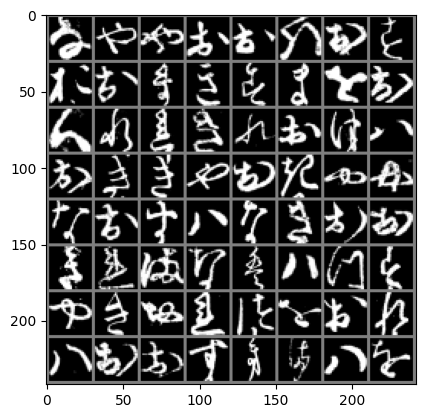

4 7 7 0 0 5 0 2


In [ ]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter) # Use next(dataiter) instead of dataiter.next()

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{labels[j].item()}' for j in range(8)))

**Step: 7**

**Define a Neural Network Model (CNN)**

***Imports***: We import necessary modules for building the neural network.
Model Definition: We define a Convolutional Neural Network (CNN) class:

***Convolutional Layers:*** Two convolutional layers (conv1 and conv2) for feature extraction.

***Dropout Layers:*** Two dropout layers (dropout1 and dropout2) to prevent overfitting.

***Fully Connected Layers:*** Two fully connected layers (fc1 and fc2) for classification.

***Forward Method:*** Defines the forward pass of the network, applying convolutions, activations, pooling, dropout, and fully connected layers.

In [ ]:
#Define a Neural Network Model (CNN)
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

net = Net()


**Step: 8**

**Train the Model**


***Loss Function and Optimizer:*** We define the loss function (cross-entropy loss) and the optimizer (Adam).

***Training Loop:*** We train the model for a specified number of epochs:
Zero Gradients: Clear the gradients from the previous step.

***Forward Pass:*** Compute the outputs of the network.
Compute Loss: Calculate the loss between the predicted outputs and the true labels.

***Backward Pass:*** Perform backpropagation to compute gradients.

***Optimizer Step:*** Update the network weights.

***Track Loss and Accuracy:*** Calculate and track the training loss and accuracy.

In [ ]:
#Train the Model
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(100 * correct / total)
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}, Accuracy: {100 * correct / total}')

print('Finished Training')


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1, Loss: 0.40158634781758035, Accuracy: 87.54666666666667
Epoch 2, Loss: 0.18828893868304264, Accuracy: 94.17666666666666
Epoch 3, Loss: 0.14587119507537818, Accuracy: 95.475
Epoch 4, Loss: 0.11830885318626187, Accuracy: 96.355
Epoch 5, Loss: 0.10374864801265068, Accuracy: 96.625
Epoch 6, Loss: 0.08887668302717573, Accuracy: 97.16333333333333
Epoch 7, Loss: 0.07898746693068977, Accuracy: 97.42
Epoch 8, Loss: 0.07187698207604987, Accuracy: 97.675
Epoch 9, Loss: 0.06536587364567038, Accuracy: 97.825
Epoch 10, Loss: 0.06228704603814852, Accuracy: 97.94166666666666
Finished Training


**Step: 9**

**Test the Model**

***No Gradient Calculation:*** Disable gradient calculation to speed up computations.

***Test Loop:*** Evaluate the model on the test dataset:

  Forward Pass: Compute the outputs of the network.

  Prediction: Determine the predicted class.

  Track Accuracy: Calculate and track the number of correct predictions.

In [ ]:
#Test the Model
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))


Accuracy of the network on the test images: 91 %


**Step: 10**

**Plot Accuracy and Loss**


***Plot Loss and Accuracy:*** Create subplots for training loss and accuracy.

***Display Plots:*** Show the plots for visualizing the training process.

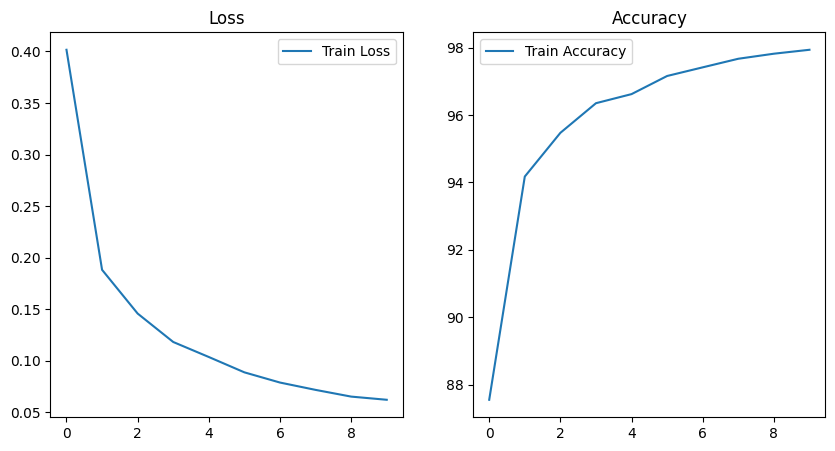

In [ ]:
#Plot Accuracy and Loss
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


**Step: 11**

**Model Prediction Visualization**

Visualizes model predictions on a batch of test images and compares them with the ground truth.

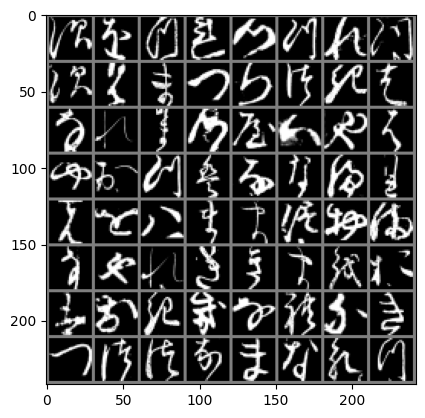

GroundTruth:  2 9 3 8 3 3 8 3
Predicted:  2 9 3 8 3 3 8 3


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter) # Use next(dataiter) instead of dataiter.next()

# Print images and labels
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{labels[j].item()}' for j in range(8)))

# Make predictions
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{predicted[j].item()}' for j in range(8)))

**Conclusion:**
*   Prepares the Kuzushiji-MNIST dataset for training and testing
*   Defines a CNN architecture for image classification.
*   Trains the model using Adam optimizer and cross-entropy loss.
*   Evaluates model performance on a separate test set.
*   Visualizes sample images, training metrics, and model predictions.








